In [1]:
import torch
import torchvision
import timm.scheduler
import matplotlib.pyplot as plt

In [2]:
# ref: https://www.kaggle.com/code/vbookshelf/pytorch-timm-workflow-for-paddy-classification
def plot_lrs_for_timm_scheduler(scheduler):
    lrs = []

    for epoch in range(num_epochs):
        #num_updates = epoch * num_steps_per_epoch
        num_steps_per_epoch = 100
        num_updates = epoch * num_steps_per_epoch

        for i in range(num_steps_per_epoch):
            num_updates += 1
            # scheduler.step_update(num_updates=num_updates)
            scheduler.step(epoch + i/100)
        # scheduler.step(epoch + 1)
        lrs.append(optimizer.param_groups[0]["lr"])
    plt.plot(lrs)
    print(list(enumerate(lrs)))

In [3]:
L_RATE = 0.0001
WEIGHT_DECAY = 0.01
NUM_EPOCHS = 100

In [4]:
training_epochs=NUM_EPOCH
cooldown_epochs=1
num_epochs = training_epochs + cooldown_epochs
num_warmup_steps = 6

In [5]:
model = torchvision.models.resnet18()

In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=L_RATE, weight_decay=WEIGHT_DECAY)

[(0, 2.485e-05), (1, 3.985e-05), (2, 5.4850000000000005e-05), (3, 6.985e-05), (4, 8.485e-05), (5, 9.985e-05), (6, 7.304178167813043e-05), (7, 6.587027116612631e-05), (8, 5.832029356700674e-05), (9, 5.057775438620113e-05), (10, 4.283330063435523e-05), (11, 3.527762646520793e-05), (12, 2.80967776526485e-05), (13, 2.1467570526313072e-05), (14, 1.555323816672907e-05), (15, 1.0499411065133215e-05), (16, 6.430531217457339e-06), (17, 3.4467879493891905e-06), (18, 1.6216509226648244e-06), (19, 1.0000610681646755e-06), (20, 4.97013380044775e-05), (21, 4.8800633452028746e-05), (22, 4.7320034143919735e-05), (23, 4.5295997348943476e-05), (24, 4.277836157038529e-05), (25, 3.982911935666738e-05), (26, 3.652089083906523e-05), (27, 3.2935135583063164e-05), (28, 2.9160146783503384e-05), (29, 2.5288877193100576e-05), (30, 2.1416650317177624e-05), (31, 1.7638813232603965e-05), (32, 1.4048388826324242e-05), (33, 1.0733785263156536e-05), (34, 7.776619083364528e-06), (35, 5.2497055325666075e-06), (36, 3.215

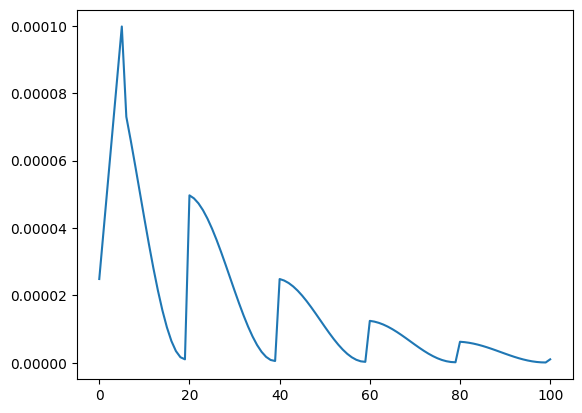

In [11]:
lr_sched = timm.scheduler.CosineLRScheduler(
    optimizer, t_initial=20, decay_rate=0.5,
    lr_min=1e-6, t_in_epochs=True, warmup_t=num_warmup_steps,
    warmup_lr_init=1e-5, cycle_limit=5,
)

plot_lrs_for_timm_scheduler(lr_sched)